In [1]:
# IKHLEF Massinissa
import os
import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt

os.chdir('C:\\Users\PC\Downloads\data')

In [2]:
#%% Import Data
citiesdata = pd.read_csv("cities.csv")
providersdata = pd.read_csv("providers.csv")
stationsdata = pd.read_csv("stations.csv")
ticketdata = pd.read_csv("ticket_data.csv")


In [4]:
#%% Understand the data

# Cities
citiesdata.info()
citiesdata.head()
# We can see that we have missing values in population column but we don't have missing 
# values in the more important columns and the type of data is already set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8040 entries, 0 to 8039
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           8040 non-null   int64  
 1   local_name   8040 non-null   object 
 2   unique_name  8039 non-null   object 
 3   latitude     8040 non-null   float64
 4   longitude    8040 non-null   float64
 5   population   369 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 377.0+ KB


,id,local_name,unique_name,latitude,longitude,population
0,5159,"Padua, Veneto, Italia",padua,45.406435,11.876761,209678.0
1,76,"Barcelona, Cataluña, España",barcelona,41.385064,2.173404,1611822.0
2,81,"Basel, Basel-Stadt, Schweiz",basel,47.593437,7.619812,NaN
3,259,"Erlangen, Bayern, Deutschland",erlangen,49.589674,11.011961,105412.0
4,11979,"Balș, Olt, România",balș,44.353354,24.095672,NaN


In [5]:
# Providers
providersdata.info()
providersdata.head()
#We can see that there are some missing values and the types are not as they are supposed to be for example transport_type should be a string

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    227 non-null    int64 
 1   company_id            227 non-null    int64 
 2   provider_id           213 non-null    object
 3   name                  227 non-null    object
 4   fullname              227 non-null    object
 5   has_wifi              224 non-null    object
 6   has_plug              224 non-null    object
 7   has_adjustable_seats  224 non-null    object
 8   has_bicycle           224 non-null    object
 9   transport_type        227 non-null    object
dtypes: int64(2), object(8)
memory usage: 17.9+ KB


,id,company_id,provider_id,name,fullname,has_wifi,has_plug,has_adjustable_seats,has_bicycle,transport_type
0,9,1,NaN,ouibus,Ouibus,True,True,True,False,bus
1,10,2,NaN,deinbus,Deinbus.de,False,False,False,False,bus
2,11,3,NaN,infobus,Infobus,False,False,False,False,bus
3,12,4,NaN,studentAgency,Student Agency,False,False,False,False,bus
4,13,5,NaN,flixbus,Flixbus,True,False,False,False,bus


In [6]:
#Stations
stationsdata.info()
stationsdata.head() 
# All is good

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11035 entries, 0 to 11034
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11035 non-null  int64  
 1   unique_name  11035 non-null  object 
 2   latitude     11035 non-null  float64
 3   longitude    11035 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 345.0+ KB


,id,unique_name,latitude,longitude
0,1,Aalen (Stuttgarter Straße),48.835296,10.092956
1,2,Aéroport Bordeaux-Mérignac,44.830226,-0.700883
2,3,Aéroport CDG,49.009900,2.559310
3,4,Aéroport de Berlin-Schönefeld,52.389446,13.520345
4,5,Aéroport de Dresden,51.123604,13.764737


In [7]:
#Tickets
ticketdata.info()
ticketdata.head()
# We can see that there are a lot of missing values in the exact stations (meaning the distances will be computed on cities) 
# furtheremore, the time in departure and arrival times/ the price in cents need to be converted.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74168 entries, 0 to 74167
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               74168 non-null  int64  
 1   company          74168 non-null  int64  
 2   o_station        32727 non-null  float64
 3   d_station        32727 non-null  float64
 4   departure_ts     74168 non-null  object 
 5   arrival_ts       74168 non-null  object 
 6   price_in_cents   74168 non-null  int64  
 7   search_ts        74168 non-null  object 
 8   middle_stations  32727 non-null  object 
 9   other_companies  32727 non-null  object 
 10  o_city           74168 non-null  int64  
 11  d_city           74168 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 6.8+ MB


,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,2017-10-01 00:13:31.327+00,NaN,NaN,611,542
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",611,542
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",611,542
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},611,542


In [9]:
#%% Insights on the data
# To be able to analyse correctly the data we have to group it using keys.
#we start by cleaning and traeting the databases

# Ticket data treatment
ticketdata=ticketdata.drop(columns=['middle_stations','other_companies'])
# convert date to date format
ticketdata.departure_ts=pd.to_datetime(ticketdata['departure_ts'] ,errors ='coerce')
ticketdata.arrival_ts=pd.to_datetime(ticketdata['arrival_ts'] ,errors ='coerce')
# Convert the price 
ticketdata.price_in_cents = ticketdata.price_in_cents/100

# citiesdata 
citiesdata= citiesdata.drop(columns=['local_name','population'])
citiesdata = citiesdata.astype({"unique_name": str})

#Merging the data
new=pd.merge(ticketdata,citiesdata, left_on='o_city',right_on='id', how='left')
new= new.drop(columns=['id_y'])

new= new.rename(columns={"unique_name": "ocity_name", "latitude": "oc_latitude","longitude": "oc_longitude"})

new=pd.merge(new,citiesdata, left_on='d_city',right_on='id', how='left')
new= new.drop(columns=['id'])
new= new.rename(columns={"unique_name": "dcity_name", "latitude": "dc_latitude","longitude": "dc_longitude"})

# Let's compute the distances 
new['distance']= np.arccos(np.sin(np.radians(new.dc_latitude))*np.sin(np.radians(new.oc_latitude))+np.cos(np.radians(new.dc_latitude))*np.cos(np.radians(new.oc_latitude))*np.cos(np.radians(new.dc_longitude-new.oc_longitude)))*6371.
new['duration']= new.arrival_ts-new.departure_ts

new= new.drop(columns=['dc_latitude','dc_longitude','oc_latitude','oc_longitude'])   

# We can now draw some insghits on the prices and durations in general
Insightdata=new.loc[:,['price_in_cents','distance','duration']]
Insightdata.describe()


,price_in_cents,distance,duration
count,74168.000000,74168.000000,74168
mean,43.827111,363.038181,0 days 07:04:37.247600
std,37.393254,194.930614,0 days 09:54:58.881351
min,3.000000,18.913242,0 days 00:20:00
25%,19.000000,205.842591,0 days 03:00:00
50%,33.500000,338.320135,0 days 04:50:00
75%,52.500000,480.413820,0 days 08:00:00
max,385.500000,1870.172021,20 days 12:51:00


since the mean is higher than the mediane, we can say that the data is skewed on the right 

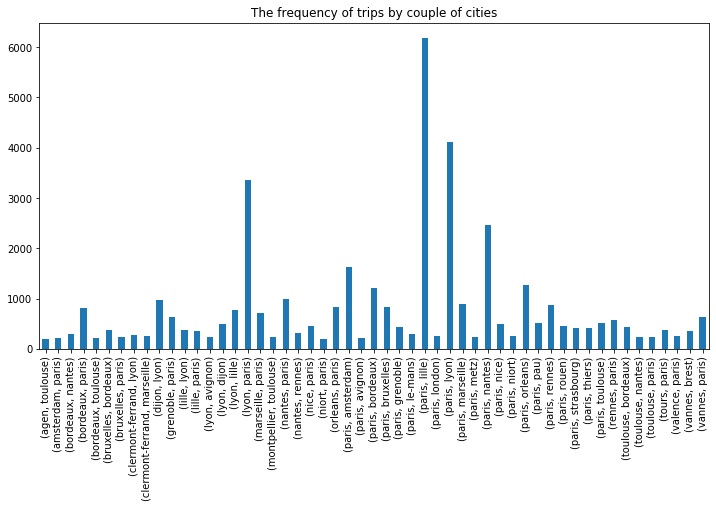

In [10]:
#Organize the data by cities
new.index = pd.MultiIndex.from_frame(new.iloc[:,[10,11]])
new = new.sort_index()

# Visualisation on the most frequent couple of cities
counted= new.groupby(new.index).count()
counted= counted.duration
counted.loc[counted>=200].plot.bar(title="The frequency of trips by couple of cities",figsize=(12,6))

We can see that most of frequent trips are from or into Paris, though for example Paris-Lyon and Lyon-Paris are taken separately.\
It would be interesting to see the travels during time (seasonality).

,pricemin,pricemean,pricemax
count,1437.000000,1437.000000,1437.000000
mean,32.012811,51.532971,79.373869
std,25.193420,35.916159,58.768859
min,3.000000,3.200000,4.000000
25%,15.500000,26.266667,36.800000
50%,26.000000,43.116667,61.500000
75%,40.000000,68.159574,108.600000
max,212.500000,305.617647,385.500000


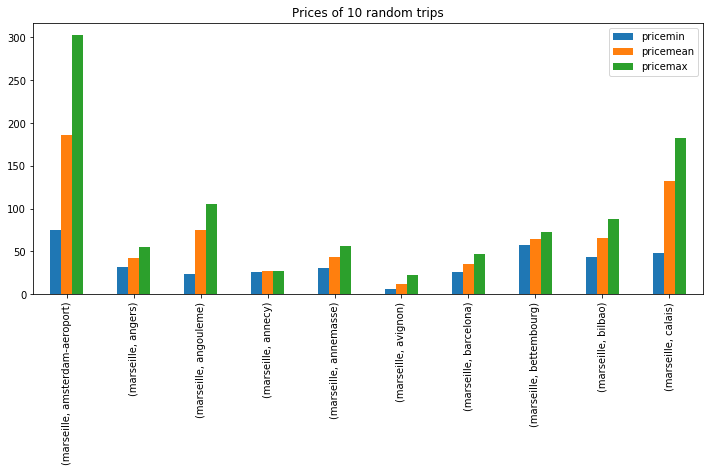

In [11]:
### prices per trip
pricemin=  new['price_in_cents'].groupby(new.index).min()
pricemean = new['price_in_cents'].groupby(new.index).mean()
pricemax = new['price_in_cents'].groupby(new.index).max()

# Random trips' prices plot
plott= pd.DataFrame({'pricemin': pricemin,'pricemean': pricemean,\
                    'pricemax':  pricemax})
plott[700:710].plot.bar(title="Prices of 10 random trips",rot=90,figsize=(12,5))
plott.describe()

In [14]:
#### durations per trip
durationmin=  new['duration'].groupby(new.index).min()

durationmean=  new['duration'].astype('timedelta64[m]').astype(float)

durationmean= durationmean.groupby(durationmean.index).mean()

for row,x in enumerate(durationmean): durationmean.iloc[row]= str(x)+"m";
durationmean=pd.to_timedelta(durationmean)
durationmax=  new['duration'].groupby(new.index).max()

plott= pd.DataFrame({'Durationmin': durationmin,'Durationmean': durationmean,\
                    'Durationmax':  durationmax})
print(plott.describe())
plott.head()

                  Durationmin             Durationmean             Durationmax
count                    1437                     1437                    1437
mean   0 days 07:29:08.016701   0 days 11:42:58.451806  0 days 22:41:59.290187
std    0 days 14:18:58.030491   0 days 17:36:16.801882  1 days 04:42:43.833169
min           0 days 00:20:00          0 days 00:44:00         0 days 00:50:00
25%           0 days 02:42:00          0 days 05:01:30         0 days 09:50:00
50%           0 days 05:00:00          0 days 08:47:45         0 days 19:40:00
75%           0 days 08:10:00   0 days 14:30:56.896551         1 days 05:05:00
max          13 days 21:20:00  14 days 04:48:19.999999        20 days 12:51:00


,Durationmin,Durationmean,Durationmax
"(aeroport-paris-vatry-, troyes)",21:55:00,21:55:00,21:55:00
"(agde, amsterdam)",08:53:00,10:18:48,15:54:00
"(agen, dijon)",12:24:00,13:42:30,15:01:00
"(agen, marseille)",05:36:00,08:17:24,12:20:00
"(agen, marseille-aeroport)",05:00:00,05:50:00,08:00:00


### Second Part


In [19]:
#Get the transport type from providers
providersdata1= providersdata[["company_id","transport_type"]].drop_duplicates()
# we can see that only the company 10' have two means of transport. Overall, there are 14 labeled companies
print("The number of companies in tickets data: ",len(new.groupby("company").count()))
# 20 companies vs 14
providersdata1= providersdata1.drop_duplicates(subset=['company_id'])

New= pd.merge(new,providersdata1, left_on='company',right_on='company_id', how='left')
New.info()

The number of companies in tickets data:  20
<class 'pandas.core.frame.DataFrame'>
Int64Index: 74168 entries, 0 to 74167
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   id_x            74168 non-null  int64              
 1   company         74168 non-null  int64              
 2   o_station       32727 non-null  float64            
 3   d_station       32727 non-null  float64            
 4   departure_ts    74168 non-null  datetime64[ns, UTC]
 5   arrival_ts      74168 non-null  datetime64[ns, UTC]
 6   price_in_cents  74168 non-null  float64            
 7   search_ts       74168 non-null  object             
 8   o_city          74168 non-null  int64              
 9   d_city          74168 non-null  int64              
 10  ocity_name      74168 non-null  object             
 11  dcity_name      74168 non-null  object             
 12  distance        74168 non-null  float64    

There is only 3.5k of complete observations.

In [24]:
#Add classes for distances
New1= New[["company","price_in_cents","ocity_name","dcity_name","distance","duration","transport_type"]]
New1["Classe"]= np.nan

for row,x in enumerate(New.distance):
    if x<201:
        New1.iloc[row,-1]=1
    elif x<801:
        New1.iloc[row,-1]=2
    elif x<2001:
        New1.iloc[row,-1]=3
    else:
        New1.iloc[row,-1]=4
del row,x   

New1.describe()

C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\PC\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,company,price_in_cents,distance,duration,Classe
count,74168.000000,74168.000000,74168.000000,74168,74168.000000
mean,7109.565527,43.827111,363.038181,0 days 07:04:37.247600,1.830857
std,3005.380792,37.393254,194.930614,0 days 09:54:58.881351,0.427541
min,9.000000,3.000000,18.913242,0 days 00:20:00,1.000000
25%,8376.000000,19.000000,205.842591,0 days 03:00:00,2.000000
50%,8385.000000,33.500000,338.320135,0 days 04:50:00,2.000000
75%,8385.000000,52.500000,480.413820,0 days 08:00:00,2.000000
max,8387.000000,385.500000,1870.172021,20 days 12:51:00,3.000000


In [25]:
New1['duration']=New1['duration'].astype('timedelta64[m]').astype(float)
New1.describe()

C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,company,price_in_cents,distance,duration,Classe
count,74168.000000,74168.000000,74168.000000,74168.000000,74168.000000
mean,7109.565527,43.827111,363.038181,424.620793,1.830857
std,3005.380792,37.393254,194.930614,594.981356,0.427541
min,9.000000,3.000000,18.913242,20.000000,1.000000
25%,8376.000000,19.000000,205.842591,180.000000,2.000000
50%,8385.000000,33.500000,338.320135,290.000000,2.000000
75%,8385.000000,52.500000,480.413820,480.000000,2.000000
max,8387.000000,385.500000,1870.172021,29571.000000,3.000000


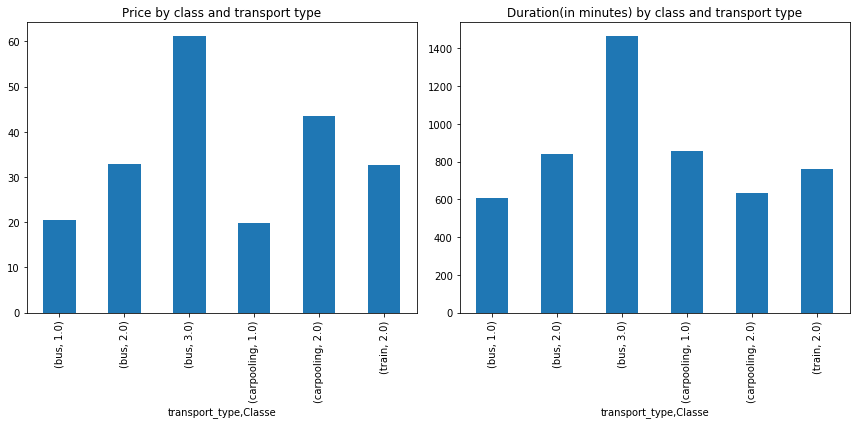

In [87]:
#Now we'll see the diffrences between transport types and distances
New2 = New1.groupby(["transport_type",'Classe']).mean()
New2.drop('company', inplace=True, axis=1)
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
New2.price_in_cents.plot.bar(title="Price by class and transport type",ax=ax1)
New2.duration.plot.bar(title="Duration(in minutes) by class and transport type",ax=ax2)
fig.tight_layout()


The interesting point is that the bars looks correlated for the bus, which means the higher the distance, the higher the duration and the more you pay. Whereas, for the car, long distances are travelled faster than low distances which makes the price even higher(for class 2, the price of the carpooling is higher than both train and bus).\
This means that the prices are driven (all other things being equal) by both distances (positive correlation) and duration (negative correlation).In the other hand, a same mean of transport takes generally more time for longer distances, the negative correlation can't be observed directly. The car showed the impact of duration by having a lower price for class 1 than the bus and a higher price for class 2.\
In reality other factors are important such as comfort..


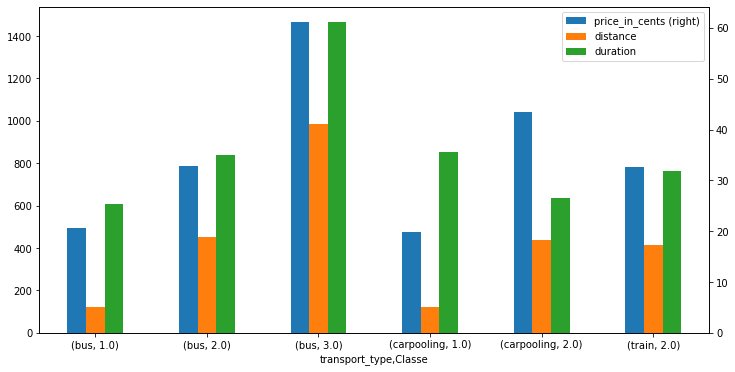

In [85]:
New2.plot( kind= 'bar' , secondary_y= 'price_in_cents' , rot= 0,figsize=(12,6) )

In [88]:
# Let's see our results numerically
for row,x in enumerate(New2.duration): New2.duration.iloc[row]= str(round(x))+"m";
New2.duration=pd.to_timedelta(New2.duration)
New2

C:\Users\PC\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


price_in_cents    distance        duration
transport_type Classe                                            
bus            1.0          20.575070  122.179003 0 days 10:07:00
               2.0          32.863730  453.426567 0 days 14:01:00
               3.0          61.127103  985.112447 1 days 00:25:00
carpooling     1.0          19.900000  123.164732 0 days 14:15:00
               2.0          43.385000  440.112680 0 days 10:36:00
train          2.0          32.655556  412.249198 0 days 12:42:00

We can say that the durations are abnormally high here especially for class 1. Further verifications have been made to check out this finding, for example the mean of all trips in class 1 is 3h and 10min, also as already seen above the average duration of all trips is 7h, whereas for class 1 it's more! \
Two possible conclusions can be drawn, either there are more sophisticated types of transport that reduced the overall average, or the sample of trips we have here (3.5K with a type of transport) is biased which is the more realistic.    

In [91]:
comparison =New2.unstack(1)
comparison

price_in_cents                          distance              \
Classe                    1.0        2.0        3.0         1.0         2.0   
transport_type                                                                
bus                  20.57507  32.863730  61.127103  122.179003  453.426567   
carpooling           19.90000  43.385000        NaN  123.164732  440.112680   
train                     NaN  32.655556        NaN         NaN  412.249198   

                           duration                           
Classe                 3.0      1.0      2.0             3.0  
transport_type                                                
bus             985.112447 10:07:00 14:01:00 1 days 00:25:00  
carpooling             NaN 14:15:00 10:36:00             NaT  
train                  NaN      NaT 12:42:00             NaT

We can see that the diffrences in terms of duration between the different classes and transport types are more or less obvious, whereas for some of the distances and prices it's not clear.

We'll perform a t test to check if the prices and distances are really different for class 1 between the bus and carpooling


In [92]:
import scipy.stats
bus= New1[(New1.transport_type=="bus")]
carpool= New1[(New1.transport_type=="carpooling")]
A=bus.price_in_cents[(bus.Classe==1)]
B=carpool.price_in_cents[(carpool.Classe==1)]
scipy.stats.ttest_ind(A, B, equal_var=False, nan_policy='propagate')

C:\Users\PC\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\PC\Anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\PC\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\PC\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\PC\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


Ttest_indResult(statistic=nan, pvalue=nan)

Since there's only 1 observation of carpooling on Class 1, we can't say statistically that there's a difference between the two types of transport

In [93]:
#Let's check for Class2
train= New1[(New1.transport_type=="train")]
A=bus.price_in_cents[(bus.Classe==2)]
B=carpool.price_in_cents[(carpool.Classe==2)]

scipy.stats.ttest_ind(A, B, equal_var=False, nan_policy='propagate')

Ttest_indResult(statistic=-3.0133565242416576, pvalue=0.05631993273920032)

The negative t stat suggests prices of buses are lower than the carpooling and the small p value confirms that it's significant  

In [94]:
# Let's see the distance
scipy.stats.ttest_ind(bus.distance[(bus.Classe==2)], carpool.distance[(carpool.Classe==2)], equal_var=False, nan_policy='propagate')

Ttest_indResult(statistic=0.26039073425449916, pvalue=0.811312594590951)

Positive t test, means the distances of the bus are higher but the p value is too high, which means we can't say the distances of the bus are significantly higher than the carpooling 

In [99]:
#Just for application we'll see the test for durations
scipy.stats.ttest_ind(bus.duration[(bus.Classe==2)], carpool.duration[(carpool.Classe==2)], equal_var=False, nan_policy='propagate')

Ttest_indResult(statistic=5.929288935236003, pvalue=0.006688899462868582)

The results confirms that the duration of the bus is signficantly higher than the carpooling for the class 2

In [95]:
# Let's check out the trains now
C=train.price_in_cents[(train.Classe==2)]
#Prices:
scipy.stats.ttest_ind(C, A, equal_var=False, nan_policy='propagate')


Ttest_indResult(statistic=-0.06423544274293162, pvalue=0.9503406660275509)

The results suggest that the prices of the train are not significantly lower than the buses'

In [98]:
#Distance:
scipy.stats.ttest_ind(train.distance[(train.Classe==2)], bus.distance[(bus.Classe==2)], equal_var=False, nan_policy='propagate')

Ttest_indResult(statistic=-0.7514694449194874, pvalue=0.47377889175815735)

The results suggest that the distances of the train are not significantly lower than the bus.

In [100]:
#duration
scipy.stats.ttest_ind(train.duration[(train.Classe==2)], bus.duration[(bus.Classe==2)], equal_var=False, nan_policy='propagate')

Ttest_indResult(statistic=-0.5484090102679738, pvalue=0.5982754285664129)

The results suggest that the durations of the train are not significantly lower than the bus.

In [105]:
#Train Vs car
#Prices:
print("Prices: ",scipy.stats.ttest_ind(C, B, equal_var=False, nan_policy='propagate'))
#Distance:
print("Distances: ",scipy.stats.ttest_ind(train.distance[(train.Classe==2)], carpool.distance[(carpool.Classe==2)], equal_var=False, nan_policy='propagate'))
#duration
print("Duration: ",scipy.stats.ttest_ind(train.duration[(train.Classe==2)], carpool.duration[(carpool.Classe==2)], equal_var=False, nan_policy='propagate'))


Prices:  Ttest_indResult(statistic=-2.258466454926345, pvalue=0.05334173900099041)
Distances:  Ttest_indResult(statistic=-0.3723325195274963, pvalue=0.7180181894617763)
Duration:  Ttest_indResult(statistic=0.857734317635545, pvalue=0.4137177359637999)


The results shows that the prices of trains are significantly lower than the cars' but we can't draw significant conclusions on duration and distance
\
We can say that there's not enough data for trains and carpooling to get significant samples on which we can draw statistical conclusions